In [67]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import os
import subprocess
import numpy as np
os.chdir("/home/jok120/sml/proj/attention-is-all-you-need-pytorch/")

In [21]:
basic_train_cmd = "/home/jok120/build/anaconda3/envs/pytorch_src2/bin/python " +\
                  "~/sml/proj/attention-is-all-you-need-pytorch/train.py " +\
                  "{data} {name} -e 1000 -b 1 -nws {warmup} -cl " +\
                  "-dm {dm} -dih {dih} --early_stopping 20 --train_only --combined_loss"

In [22]:
# params = {"warmup": [1, 10, 100, 250, 500, 1000 ],
#           "dm": [128, 256, 512, 1024, 2048],
#           "dih": [512, 1024, 2048],
#           "dwv": [8, 20, 24, 48, 128, 256]}
params = {"warmup": [5, 100, 500, 1000],
          "dm": [128, 256, 512, 1024, 2048],
          "dih": [512, 1024, 2048]}
# data_path = "data/data_190529_multi_helix_turns.tch"
data_path = "data/data_190530_3p7k.tch"
name = "0530-3p7k-{:03}"

In [23]:
i = 0
cmds = []
for dih in params["dih"]:
    for dm in params["dm"]:
        for warmup in params["warmup"]:
            cmd = basic_train_cmd.format(data=data_path, name=name.format(i),
                                         warmup=warmup, dm=dm, dih=dih)
            cmds.append(cmd)
            print(cmd[164:] + f" logs/0530-3p7k-{i:03}.log")
            with open("logs/" + name.format(i) + ".log", "w") as log:
                subprocess.call(cmd, stdout=log, shell=True)
            i += 1

 -nws 5 -cl -dm 128 -dih 512 --early_stopping 20 --train_only --combined_loss logs/0530-3p7k-000.log
 -nws 100 -cl -dm 128 -dih 512 --early_stopping 20 --train_only --combined_loss logs/0530-3p7k-001.log
 -nws 500 -cl -dm 128 -dih 512 --early_stopping 20 --train_only --combined_loss logs/0530-3p7k-002.log
 -nws 1000 -cl -dm 128 -dih 512 --early_stopping 20 --train_only --combined_loss logs/0530-3p7k-003.log
 -nws 5 -cl -dm 256 -dih 512 --early_stopping 20 --train_only --combined_loss logs/0530-3p7k-004.log
 -nws 100 -cl -dm 256 -dih 512 --early_stopping 20 --train_only --combined_loss logs/0530-3p7k-005.log
 -nws 500 -cl -dm 256 -dih 512 --early_stopping 20 --train_only --combined_loss logs/0530-3p7k-006.log
 -nws 1000 -cl -dm 256 -dih 512 --early_stopping 20 --train_only --combined_loss logs/0530-3p7k-007.log
 -nws 5 -cl -dm 512 -dih 512 --early_stopping 20 --train_only --combined_loss logs/0530-3p7k-008.log
 -nws 100 -cl -dm 512 -dih 512 --early_stopping 20 --train_only --combined_lo

# Analysis

In [51]:
from glob import glob
import seaborn as sns
sns.set(style="darkgrid")

In [190]:
result_files = sorted(glob("logs/0530-3p7k*.train"))

In [105]:
dfs = [pd.read_csv(f) for f in result_files]
titles = [f[5:-6] for f in result_files]
dfes = []
for df in dfs:
    df["rmse"] = np.sqrt(df["mse"])
    dfes.append(df[df["is_end_of_epoch"]].reset_index())

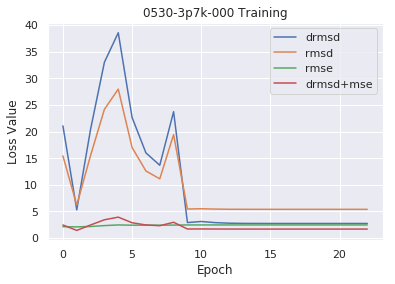

In [113]:
def do_plot(df, title):
    sns.lineplot(x=df.index, y="drmsd", data=df, label="drmsd")
    sns.lineplot(x=df.index, y="rmsd", data=df, label="rmsd")
    sns.lineplot(x=df.index, y="rmse", data=df, label="rmse")
    sns.lineplot(x=df.index, y="combined", data=df, label="drmsd+mse")
    plt.ylabel("Loss Value")
    plt.xlabel("Epoch")
    plt.legend()
    plt.title("{} Training".format(title))
do_plot(dfes[0], titles[0])

In [106]:
mins = []
for df, title in zip(dfes, titles):
    row = df[df["combined"] == df["combined"].min()]
    row["title"] = title[:]
    mins.append(row)

/home/jok120/build/anaconda3/envs/pytorch_src2/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [109]:
mins_df = pd.concat(mins)

In [116]:
mins_df.sort_values("combined", inplace=True)

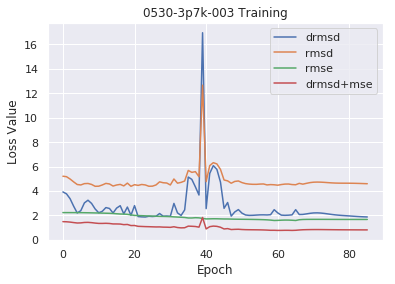

In [114]:
nums mins_df

In [120]:
names =  [int(t[-3:]) for t in mins_df["title"][:10]]
print(names)

[3, 58, 41, 27, 21, 31, 57, 23, 50, 34]


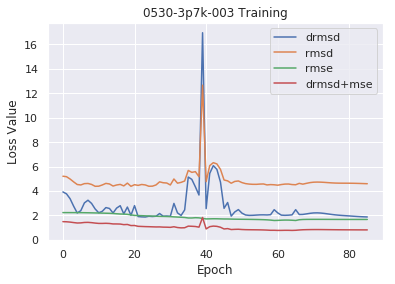

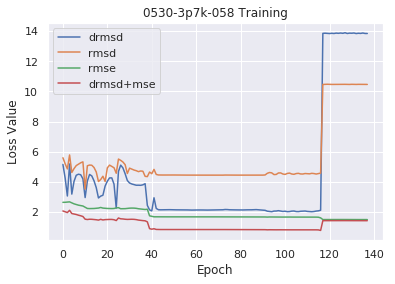

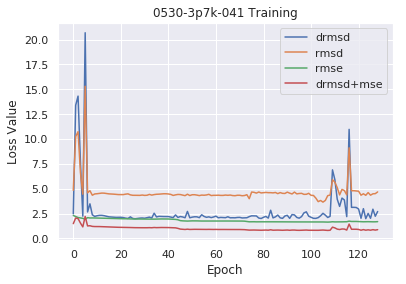

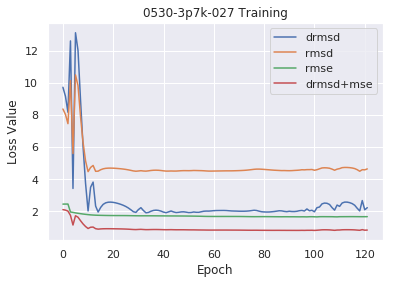

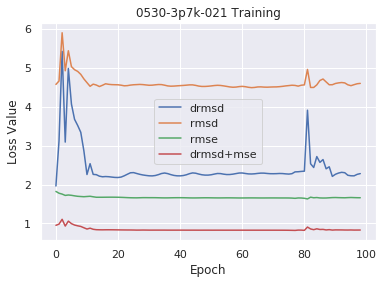

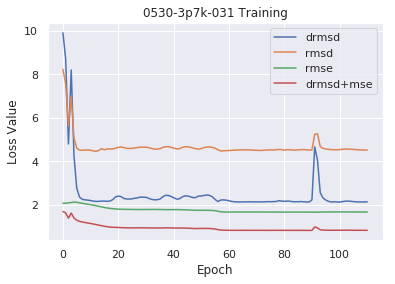

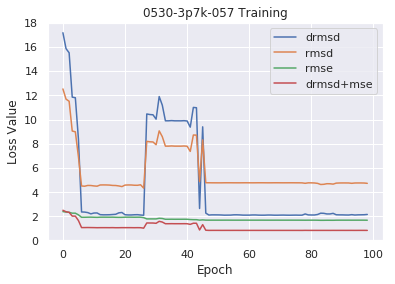

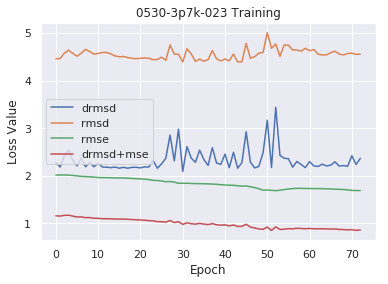

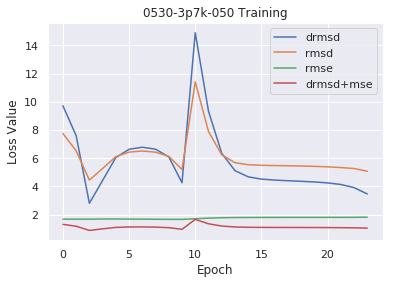

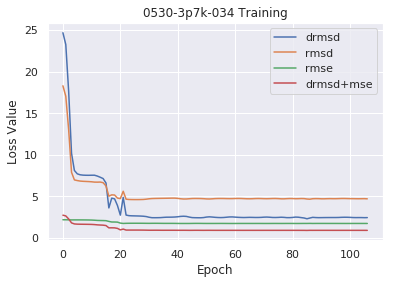

In [121]:
for n in names:
    do_plot(dfes[n], titles[n])
    plt.show()

In [124]:
train_logs =  [f"logs/{t}.log" for t in mins_df["title"][:10]]
train_logs

['logs/0530-3p7k-003.log',
 'logs/0530-3p7k-058.log',
 'logs/0530-3p7k-041.log',
 'logs/0530-3p7k-027.log',
 'logs/0530-3p7k-021.log',
 'logs/0530-3p7k-031.log',
 'logs/0530-3p7k-057.log',
 'logs/0530-3p7k-023.log',
 'logs/0530-3p7k-050.log',
 'logs/0530-3p7k-034.log']

In [129]:
with open(train_logs[0], "r") as f:
    a = f.readline()
    print(a)

Namespace(batch_size=1, clip=None, combined_loss=True, cuda=True, d_inner_hid=512, d_k=64, d_model=128, d_v=64, d_word_vec=128, data='data/data_190530_3p7k.tch', dropout=0, early_stopping=20, epochs=1000, learning_rate=0.001, log=None, log_file='./logs/0530-3p7k-003.train', max_token_seq_len=45, n_head=8, n_layers=6, n_warmup_steps=1000, name='0530-3p7k-003', no_cuda=False, print_loss=False, save_mode='best', train_only=True) 



In [140]:
import re
m = re.search("n_head=(.+?),", a)

In [141]:
m.group(1)

'8'

In [142]:
def get_arg(namespace, arg):
    pattern = f"{arg}=(.+?),"
    return re.search(pattern, namespace).group(1)

In [144]:
for row in mins:
    t = row["title"].item()
    with open(f"logs/{t}.log", "r") as f:
        args = f.readline()
    for a in ["d_model", "n_warmup_steps", "d_inner_hid"]:
        row[a] = get_arg(args, a)

/home/jok120/build/anaconda3/envs/pytorch_src2/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [149]:
mins = pd.concat(mins)
mins.sort_values("combined", inplace=True)

In [150]:
mins

,index,drmsd,mse,rmsd,combined,lr,is_val,is_end_of_epoch,time,rmse,title,d_model,n_warmup_steps,d_inner_hid
64,129,2.046930,2.577891,4.528007,0.772406,0.000182,False,True,1.559247e+09,1.605581,0530-3p7k-003,128,1000,512
116,233,2.122737,2.616809,4.584381,0.786873,0.000231,False,True,1.559255e+09,1.617655,0530-3p7k-058,2048,500,2048
107,215,2.107911,2.699347,4.305342,0.806581,0.008505,False,True,1.559251e+09,1.642969,0530-3p7k-041,128,100,2048
100,201,1.969922,2.752858,4.555178,0.811335,0.000200,False,True,1.559249e+09,1.659174,0530-3p7k-027,256,1000,1024
77,155,2.324106,2.706930,4.542761,0.821989,0.006894,False,True,1.559249e+09,1.645275,0530-3p7k-021,128,100,1024
89,179,2.137529,2.793846,4.518596,0.832057,0.000126,False,True,1.559250e+09,1.671480,0530-3p7k-031,512,1000,1024
77,155,2.106678,2.860006,4.771723,0.846669,0.001724,False,True,1.559254e+09,1.691155,0530-3p7k-057,2048,100,2048
51,103,2.173212,2.866980,4.678549,0.852571,0.000145,False,True,1.559249e+09,1.693216,0530-3p7k-023,128,1000,1024
2,5,2.803872,2.814255,4.449490,0.878806,0.000012,False,True,1.559253e+09,1.677574,0530-3p7k-050,512,500,2048
85,171,2.297126,3.011705,4.675044,0.896497,0.000240,False,True,1.559250e+09,1.735427,0530-3p7k-034,1024,500,1024


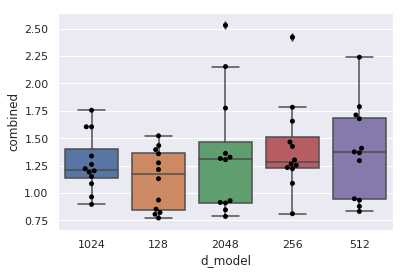

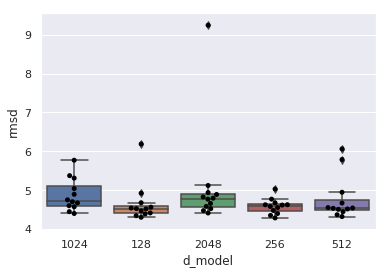

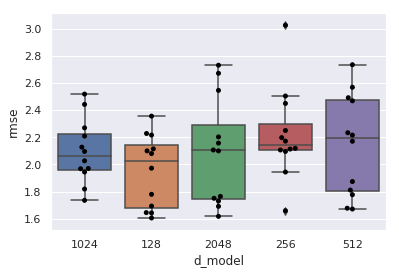

In [177]:
def do_loss_plots_on_var(d, var):
    sns.boxplot(x=var, y="combined", data=d)
    sns.swarmplot(x=var, y="combined", data=d, color="black")
    plt.figure()
    sns.boxplot(x=var, y="rmsd", data=d)
    sns.swarmplot(x=var, y="rmsd", data=d, color="black")
    plt.figure()
    sns.boxplot(x=var, y="rmse", data=d)
    sns.swarmplot(x=var, y="rmse", data=d, color="black")

do_loss_plots_on_var(mins, "d_model")

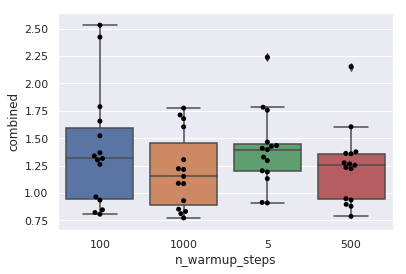

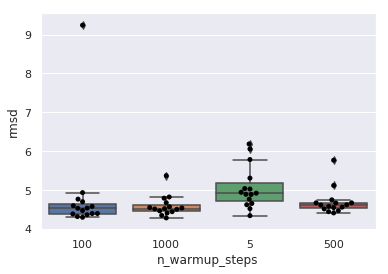

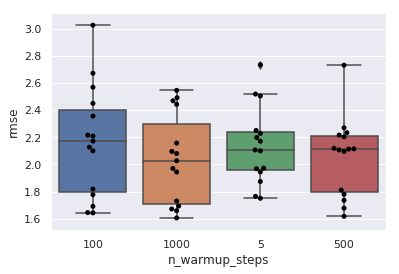

In [178]:
do_loss_plots_on_var(mins, "n_warmup_steps")

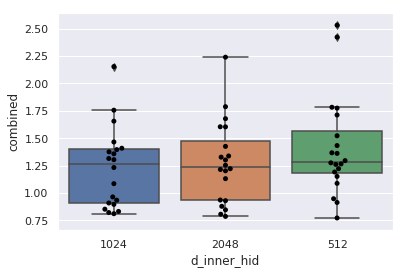

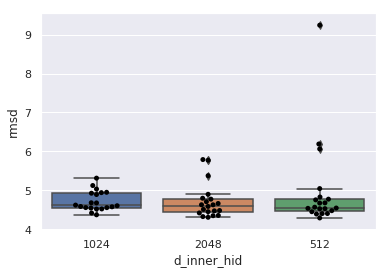

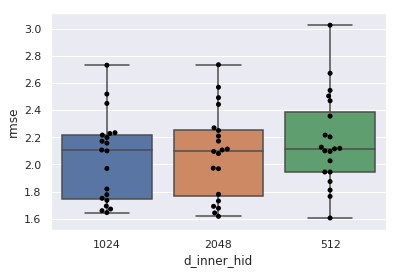

In [179]:
do_loss_plots_on_var(mins, "d_inner_hid")

In [184]:
summary = mins[["title", "combined", "drmsd", "rmsd", "rmse", "d_model", "n_warmup_steps", "d_inner_hid"]]

In [188]:
" ".join(summary["title"][:10].to_list())

'0530-3p7k-003 0530-3p7k-058 0530-3p7k-041 0530-3p7k-027 0530-3p7k-021 0530-3p7k-031 0530-3p7k-057 0530-3p7k-023 0530-3p7k-050 0530-3p7k-034'

In [189]:
summary

,title,combined,drmsd,rmsd,rmse,d_model,n_warmup_steps,d_inner_hid
64,0530-3p7k-003,0.772406,2.046930,4.528007,1.605581,128,1000,512
116,0530-3p7k-058,0.786873,2.122737,4.584381,1.617655,2048,500,2048
107,0530-3p7k-041,0.806581,2.107911,4.305342,1.642969,128,100,2048
100,0530-3p7k-027,0.811335,1.969922,4.555178,1.659174,256,1000,1024
77,0530-3p7k-021,0.821989,2.324106,4.542761,1.645275,128,100,1024
89,0530-3p7k-031,0.832057,2.137529,4.518596,1.671480,512,1000,1024
77,0530-3p7k-057,0.846669,2.106678,4.771723,1.691155,2048,100,2048
51,0530-3p7k-023,0.852571,2.173212,4.678549,1.693216,128,1000,1024
2,0530-3p7k-050,0.878806,2.803872,4.449490,1.677574,512,500,2048
85,0530-3p7k-034,0.896497,2.297126,4.675044,1.735427,1024,500,1024
